<h1 dir=rtl>پاسخ ۱ - تخمین قیمت رمزارز ها</h1>
<h2 dir=rtl>۱-۲. مجموعه دادگان و پیش پردازش آنها</h2>

In [1]:
import pandas as pd

litecoin = pd.read_csv('Litecoin Historical Data - Investing.com.csv').iloc[::-1].reset_index()
monero = pd.read_csv('Monero Historical Data - Investing.com.csv').iloc[::-1].reset_index()

In [2]:
litecoin

,index,Date,Price,Open,High,Low,Vol.,Change %
0,1278,"Aug 24, 2016",3.840,3.950,3.960,3.610,21.86K,-2.78%
1,1277,"Aug 25, 2016",3.810,3.840,3.880,3.750,21.87K,-0.78%
2,1276,"Aug 26, 2016",3.810,3.810,3.900,3.770,14.35K,0.00%
3,1275,"Aug 27, 2016",3.780,3.810,3.850,3.620,4.91K,-0.79%
4,1274,"Aug 28, 2016",3.720,3.780,3.780,3.620,8.19K,-1.59%
...,...,...,...,...,...,...,...,...
1274,4,"Feb 19, 2020",70.782,77.173,79.041,68.264,12.10M,-8.28%
1275,3,"Feb 20, 2020",69.455,70.782,72.339,66.495,12.45M,-1.87%
1276,2,"Feb 21, 2020",73.291,69.455,75.161,68.633,12.13M,5.52%
1277,1,"Feb 22, 2020",74.818,73.288,76.642,72.422,11.56M,2.08%


In [3]:
monero

,index,Date,Price,Open,High,Low,Vol.,Change %
0,1850,"Jan 30, 2015",0.303,0.311,0.350,0.303,1.33K,-2.57%
1,1849,"Jan 31, 2015",0.290,0.303,0.303,0.290,0.48K,-4.33%
2,1848,"Feb 01, 2015",0.290,0.290,0.290,0.290,-,0.00%
3,1847,"Feb 02, 2015",0.303,0.290,0.303,0.287,0.35K,4.59%
4,1846,"Feb 03, 2015",0.331,0.303,0.360,0.302,1.47K,9.31%
...,...,...,...,...,...,...,...,...
1846,4,"Feb 19, 2020",77.843,86.158,86.914,76.718,304.86K,-9.65%
1847,3,"Feb 20, 2020",76.355,77.843,78.903,75.102,384.42K,-1.91%
1848,2,"Feb 21, 2020",80.313,76.355,82.285,75.886,290.15K,5.18%
1849,1,"Feb 22, 2020",79.027,80.308,82.896,78.169,277.07K,-1.60%


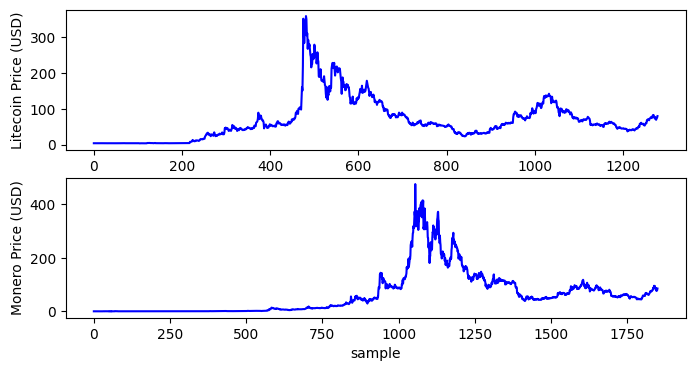

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
plt.subplot(2, 1, 1)
plt.plot(litecoin['Price'], 'b')
plt.xlabel('sample')
plt.ylabel('Litecoin Price (USD)')
plt.subplot(2, 1, 2)
plt.plot(monero['Price'], 'b')
plt.xlabel('sample')
plt.ylabel('Monero Price (USD)')
plt.show()

In [5]:
import numpy as np

def data_preperation(dataframe, w):
  price = dataframe['Price']
  min_p = min(price)
  max_p = max(price)
  price = (price - min_p) / (max_p - min_p)
  x = np.zeros((len(dataframe) - w, w, 1))
  y = np.zeros((len(dataframe) - w, 1))
  for i in range(len(dataframe) - w):
    x[i, :, 0] = price.iloc[i:i+w]
    y[i, :] = price.iloc[i+w]
  return min_p, max_p, x, y

litecoin_min, litecoin_max, litecoin_x, litecoin_y = data_preperation(litecoin, 30)
monero_min, monero_max, monero_x, monero_y = data_preperation(monero, 30)

In [6]:
def test_train(x, y, p):
  assert len(x) == len(y)
  n = len(y)
  index = np.random.permutation(n)
  test_index = index[:(round(n * p))]
  train_index = index[round(n * p):]
  return x[test_index, :, :], y[test_index, :], x[train_index, :, :], y[train_index, :], test_index

litecoin_x_test, litecoin_y_test, litecoin_x_train, litecoin_y_train, l_test_index = test_train(litecoin_x, litecoin_y, 0.3)
monero_x_test, monero_y_test, monero_x_train, monero_y_train, m_test_index = test_train(monero_x, monero_y, 0.3)

<h2 dir=rtl>۱-۳. آموزش مدل ها</h2>

Model: "litecoin_lstm_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 l_l_lstm (LSTM)             (None, 50)                10400     
                                                                 
 l_l_dense (Dense)           (None, 1)                 51        
                                                                 
Total params: 10,451
Trainable params: 10,451
Non-trainable params: 0
_________________________________________________________________


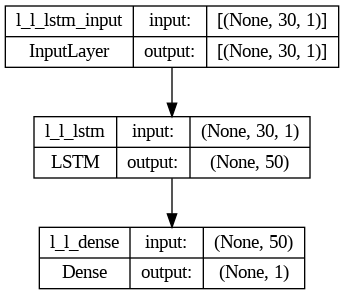

In [7]:
from keras import Sequential, layers
from keras.utils import plot_model

litecoin_lstm_model = Sequential(name='litecoin_lstm_model')
litecoin_lstm_model.add(layers.LSTM(50, input_shape=(30, 1), name='l_l_lstm'))
litecoin_lstm_model.add(layers.Dense(1, activation='linear', name='l_l_dense'))
litecoin_lstm_model.compile(optimizer='Adam', metrics=['mae'], loss='mse')
litecoin_lstm_model.summary()
plot_model(litecoin_lstm_model, show_shapes=True)

In [8]:
l_l_history = litecoin_lstm_model.fit(litecoin_x_train, litecoin_y_train, batch_size=100, epochs=100, 
                                      validation_data=(litecoin_x_test, litecoin_y_test))

Epoch 1/100
9/9 [==============================] - 5s 122ms/step - loss: 0.0271 - mae: 0.1096 - val_loss: 0.0042 - val_mae: 0.0511
Epoch 2/100
9/9 [==============================] - 0s 38ms/step - loss: 0.0072 - mae: 0.0735 - val_loss: 0.0037 - val_mae: 0.0521
Epoch 3/100
9/9 [==============================] - 0s 37ms/step - loss: 0.0038 - mae: 0.0397 - val_loss: 0.0022 - val_mae: 0.0293
Epoch 4/100
9/9 [==============================] - 0s 32ms/step - loss: 0.0028 - mae: 0.0288 - val_loss: 0.0014 - val_mae: 0.0231
Epoch 5/100
9/9 [==============================] - 0s 35ms/step - loss: 0.0022 - mae: 0.0263 - val_loss: 0.0013 - val_mae: 0.0198
Epoch 6/100
9/9 [==============================] - 0s 33ms/step - loss: 0.0021 - mae: 0.0220 - val_loss: 0.0012 - val_mae: 0.0177
Epoch 7/100
9/9 [==============================] - 0s 37ms/step - loss: 0.0019 - mae: 0.0209 - val_loss: 0.0012 - val_mae: 0.0184
Epoch 8/100
9/9 [==============================] - 0s 36ms/step - loss: 0.0018 - mae: 0.0

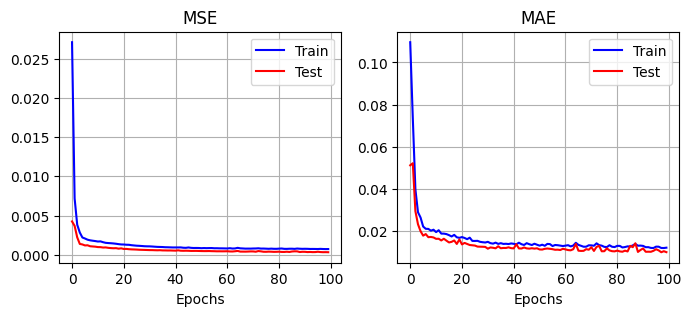

In [9]:
plt.figure(figsize=(8, 3))
plt.subplot(1, 2, 1)
plt.plot(l_l_history.history['loss'], 'b')
plt.plot(l_l_history.history['val_loss'], 'r')
plt.legend(['Train', 'Test'])
plt.grid()
plt.xlabel('Epochs')
plt.title('MSE')
plt.subplot(1, 2, 2)
plt.plot(l_l_history.history['mae'], 'b')
plt.plot(l_l_history.history['val_mae'], 'r')
plt.legend(['Train', 'Test'])
plt.grid()
plt.xlabel('Epochs')
plt.title('MAE')
plt.show()

Model: "monero_lstm_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 m_l_lstm (LSTM)             (None, 50)                10400     
                                                                 
 m_l_dense (Dense)           (None, 1)                 51        
                                                                 
Total params: 10,451
Trainable params: 10,451
Non-trainable params: 0
_________________________________________________________________


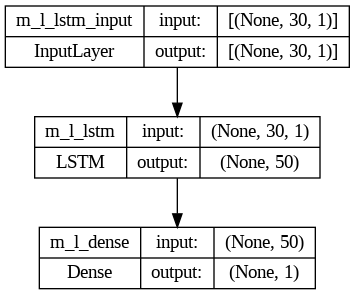

In [10]:
monero_lstm_model = Sequential(name='monero_lstm_model')
monero_lstm_model.add(layers.LSTM(50, input_shape=(30, 1), name='m_l_lstm'))
monero_lstm_model.add(layers.Dense(1, activation='linear', name='m_l_dense'))
monero_lstm_model.compile(optimizer='Adam', metrics=['mae'], loss='mse')
monero_lstm_model.summary()
plot_model(monero_lstm_model, show_shapes=True)

In [11]:
m_l_history = monero_lstm_model.fit(monero_x_train, monero_y_train, batch_size=100, epochs=100, 
                                      validation_data=(monero_x_test, monero_y_test))

Epoch 1/100
13/13 [==============================] - 4s 90ms/step - loss: 0.0182 - mae: 0.0845 - val_loss: 0.0065 - val_mae: 0.0732
Epoch 2/100
13/13 [==============================] - 0s 34ms/step - loss: 0.0039 - mae: 0.0531 - val_loss: 0.0012 - val_mae: 0.0212
Epoch 3/100
13/13 [==============================] - 1s 50ms/step - loss: 0.0014 - mae: 0.0219 - val_loss: 0.0010 - val_mae: 0.0172
Epoch 4/100
13/13 [==============================] - 1s 64ms/step - loss: 0.0011 - mae: 0.0163 - val_loss: 7.1903e-04 - val_mae: 0.0155
Epoch 5/100
13/13 [==============================] - 1s 113ms/step - loss: 0.0010 - mae: 0.0185 - val_loss: 6.3919e-04 - val_mae: 0.0147
Epoch 6/100
13/13 [==============================] - 2s 119ms/step - loss: 9.0725e-04 - mae: 0.0151 - val_loss: 5.7637e-04 - val_mae: 0.0128
Epoch 7/100
13/13 [==============================] - 1s 75ms/step - loss: 8.8297e-04 - mae: 0.0143 - val_loss: 5.6914e-04 - val_mae: 0.0116
Epoch 8/100
13/13 [==============================]

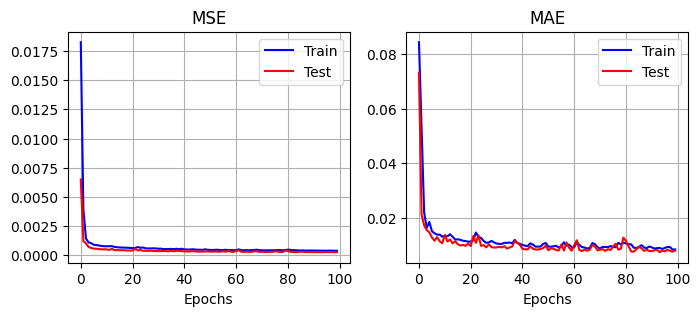

In [12]:
plt.figure(figsize=(8, 3))
plt.subplot(1, 2, 1)
plt.plot(m_l_history.history['loss'], 'b')
plt.plot(m_l_history.history['val_loss'], 'r')
plt.legend(['Train', 'Test'])
plt.grid()
plt.xlabel('Epochs')
plt.title('MSE')
plt.subplot(1, 2, 2)
plt.plot(m_l_history.history['mae'], 'b')
plt.plot(m_l_history.history['val_mae'], 'r')
plt.legend(['Train', 'Test'])
plt.grid()
plt.xlabel('Epochs')
plt.title('MAE')
plt.show()

Model: "litecoin_hybrid_model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 l_h_input (InputLayer)         [(None, 30, 1)]      0           []                               
                                                                                                  
 l_h_lstm1 (LSTM)               (None, 30, 30)       3840        ['l_h_input[0][0]']              
                                                                                                  
 l_h_do1 (Dropout)              (None, 30, 30)       0           ['l_h_lstm1[0][0]']              
                                                                                                  
 l_h_gru (GRU)                  (None, 30)           2970        ['l_h_input[0][0]']              
                                                                              

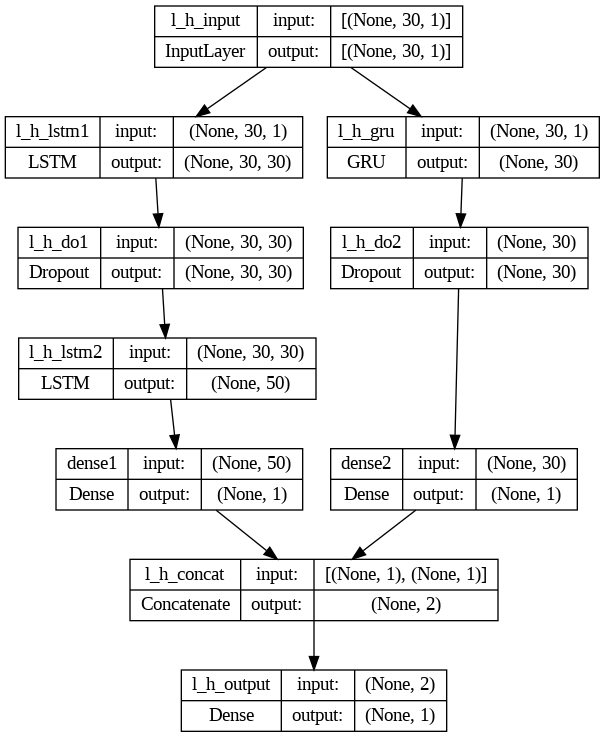

In [13]:
from keras import Model

l_h_input = layers.Input(shape=(30, 1), name='l_h_input')
l_h_lstm1 = layers.LSTM(30, name='l_h_lstm1', return_sequences=True)(l_h_input)
l_h_do1 = layers.Dropout(0.1, name='l_h_do1')(l_h_lstm1)
l_h_lstm2 = layers.LSTM(50, name='l_h_lstm2')(l_h_do1)
l_h_dense1 = layers.Dense(1, activation='linear', name='dense1')(l_h_lstm2)
l_h_gru = layers.GRU(30, name='l_h_gru')(l_h_input)
l_h_do2 = layers.Dropout(0.1, name='l_h_do2')(l_h_gru)
l_h_dense2 = layers.Dense(1, activation='linear', name='dense2')(l_h_do2)
l_h_concat = layers.Concatenate(name='l_h_concat')([l_h_dense1, l_h_dense2])
l_h_output = layers.Dense(1, activation='linear', name='l_h_output')(l_h_concat)
litecoin_hybrid_model = Model(inputs=l_h_input, outputs=l_h_output, name='litecoin_hybrid_model')

litecoin_hybrid_model.compile(optimizer='Adam', metrics=['mae'], loss='mse')
litecoin_hybrid_model.summary()
plot_model(litecoin_hybrid_model, show_shapes=True)

In [14]:
l_h_history = litecoin_hybrid_model.fit(litecoin_x_train, litecoin_y_train, batch_size=100, epochs=100, 
                                      validation_data=(litecoin_x_test, litecoin_y_test))

Epoch 1/100
9/9 [==============================] - 22s 821ms/step - loss: 0.0632 - mae: 0.1812 - val_loss: 0.0352 - val_mae: 0.1342
Epoch 2/100
9/9 [==============================] - 1s 137ms/step - loss: 0.0294 - mae: 0.1149 - val_loss: 0.0154 - val_mae: 0.1065
Epoch 3/100
9/9 [==============================] - 1s 99ms/step - loss: 0.0167 - mae: 0.1041 - val_loss: 0.0091 - val_mae: 0.0698
Epoch 4/100
9/9 [==============================] - 1s 119ms/step - loss: 0.0105 - mae: 0.0655 - val_loss: 0.0050 - val_mae: 0.0520
Epoch 5/100
9/9 [==============================] - 1s 126ms/step - loss: 0.0064 - mae: 0.0557 - val_loss: 0.0031 - val_mae: 0.0380
Epoch 6/100
9/9 [==============================] - 1s 128ms/step - loss: 0.0050 - mae: 0.0396 - val_loss: 0.0027 - val_mae: 0.0333
Epoch 7/100
9/9 [==============================] - 1s 112ms/step - loss: 0.0044 - mae: 0.0377 - val_loss: 0.0023 - val_mae: 0.0305
Epoch 8/100
9/9 [==============================] - 1s 130ms/step - loss: 0.0040 - m

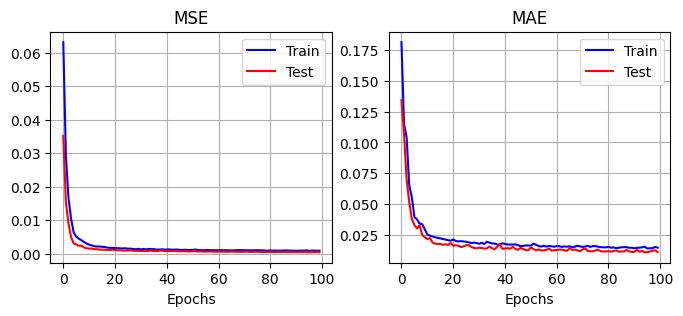

In [15]:
plt.figure(figsize=(8, 3))
plt.subplot(1, 2, 1)
plt.plot(l_h_history.history['loss'], 'b')
plt.plot(l_h_history.history['val_loss'], 'r')
plt.legend(['Train', 'Test'])
plt.grid()
plt.xlabel('Epochs')
plt.title('MSE')
plt.subplot(1, 2, 2)
plt.plot(l_h_history.history['mae'], 'b')
plt.plot(l_h_history.history['val_mae'], 'r')
plt.legend(['Train', 'Test'])
plt.grid()
plt.xlabel('Epochs')
plt.title('MAE')
plt.show()

Model: "monero_hybrid_model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 m_h_input (InputLayer)         [(None, 30, 1)]      0           []                               
                                                                                                  
 m_h_lstm1 (LSTM)               (None, 30, 30)       3840        ['m_h_input[0][0]']              
                                                                                                  
 m_h_do1 (Dropout)              (None, 30, 30)       0           ['m_h_lstm1[0][0]']              
                                                                                                  
 m_h_gru (GRU)                  (None, 30)           2970        ['m_h_input[0][0]']              
                                                                                

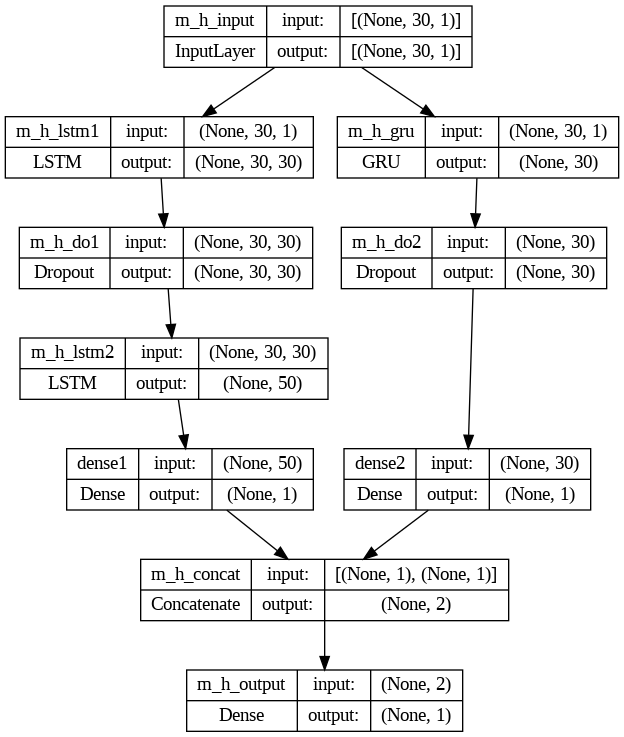

In [16]:
m_h_input = layers.Input(shape=(30, 1), name='m_h_input')
m_h_lstm1 = layers.LSTM(30, name='m_h_lstm1', return_sequences=True)(m_h_input)
m_h_do1 = layers.Dropout(0.1, name='m_h_do1')(m_h_lstm1)
m_h_lstm2 = layers.LSTM(50, name='m_h_lstm2')(m_h_do1)
m_h_dense1 = layers.Dense(1, activation='linear', name='dense1')(m_h_lstm2)
m_h_gru = layers.GRU(30, name='m_h_gru')(m_h_input)
m_h_do2 = layers.Dropout(0.1, name='m_h_do2')(m_h_gru)
m_h_dense2 = layers.Dense(1, activation='linear', name='dense2')(m_h_do2)
m_h_concat = layers.Concatenate(name='m_h_concat')([m_h_dense1, m_h_dense2])
m_h_output = layers.Dense(1, activation='linear', name='m_h_output')(m_h_concat)
monero_hybrid_model = Model(inputs=m_h_input, outputs=m_h_output, name='monero_hybrid_model')

monero_hybrid_model.compile(optimizer='Adam', metrics=['mae'], loss='mse')
monero_hybrid_model.summary()
plot_model(monero_hybrid_model, show_shapes=True)

In [17]:
m_h_history = monero_hybrid_model.fit(monero_x_train, monero_y_train, batch_size=100, epochs=100, 
                                      validation_data=(monero_x_test, monero_y_test))

Epoch 1/100
13/13 [==============================] - 19s 316ms/step - loss: 0.0198 - mae: 0.0945 - val_loss: 0.0090 - val_mae: 0.0916
Epoch 2/100
13/13 [==============================] - 1s 101ms/step - loss: 0.0046 - mae: 0.0495 - val_loss: 0.0015 - val_mae: 0.0230
Epoch 3/100
13/13 [==============================] - 2s 117ms/step - loss: 0.0022 - mae: 0.0238 - val_loss: 0.0016 - val_mae: 0.0230
Epoch 4/100
13/13 [==============================] - 1s 90ms/step - loss: 0.0017 - mae: 0.0237 - val_loss: 0.0011 - val_mae: 0.0221
Epoch 5/100
13/13 [==============================] - 1s 71ms/step - loss: 0.0015 - mae: 0.0208 - val_loss: 9.1779e-04 - val_mae: 0.0170
Epoch 6/100
13/13 [==============================] - 1s 72ms/step - loss: 0.0014 - mae: 0.0180 - val_loss: 8.6133e-04 - val_mae: 0.0163
Epoch 7/100
13/13 [==============================] - 1s 71ms/step - loss: 0.0013 - mae: 0.0178 - val_loss: 8.6695e-04 - val_mae: 0.0137
Epoch 8/100
13/13 [==============================] - 1s 70ms

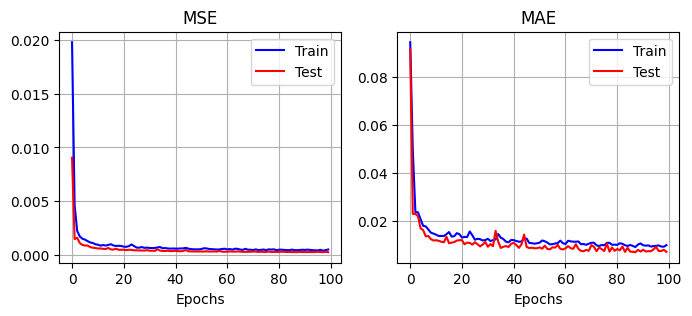

In [18]:
plt.figure(figsize=(8, 3))
plt.subplot(1, 2, 1)
plt.plot(m_h_history.history['loss'], 'b')
plt.plot(m_h_history.history['val_loss'], 'r')
plt.legend(['Train', 'Test'])
plt.grid()
plt.xlabel('Epochs')
plt.title('MSE')
plt.subplot(1, 2, 2)
plt.plot(m_h_history.history['mae'], 'b')
plt.plot(m_h_history.history['val_mae'], 'r')
plt.legend(['Train', 'Test'])
plt.grid()
plt.xlabel('Epochs')
plt.title('MAE')
plt.show()

<h2 dir=rtl>۱-۴. ارزیابی و تحلیل نتایج</h2>

12/12 [==============================] - 0s 13ms/step
========== LSTM model | Litecoin | 1 ==========
MSE = 1140.1149755830756
RMSE = 33.765588630780236
MAE = 19.38211964736397
MAPE = 0.32270346132338995
12/12 [==============================] - 0s 13ms/step
========== hybrid model | Litecoin | 1 ==========
MSE = 1112.9245459871597
RMSE = 33.36052376667908
MAE = 19.530368845562023
MAPE = 0.36480353977409835


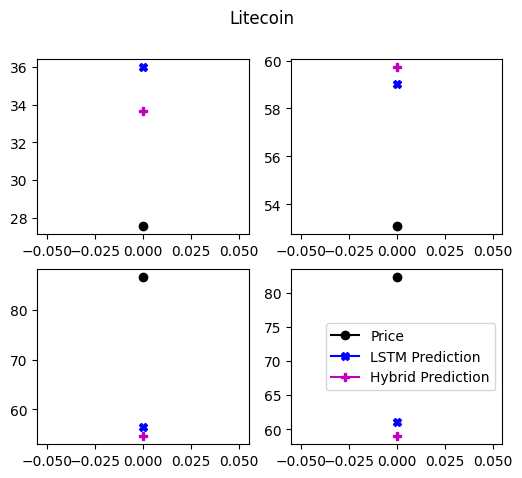

18/18 [==============================] - 0s 6ms/step
========== LSTM model | Monero | 1 ==========
MSE = 1392.2277975104328
RMSE = 37.31256889454856
MAE = 18.19577866373545
MAPE = 0.8320430091495024
18/18 [==============================] - 0s 12ms/step
========== hybrid model | Monero | 1 ==========
MSE = 1383.4545172684886
RMSE = 37.19481841961981
MAE = 18.073872791768835
MAPE = 0.650935758940041


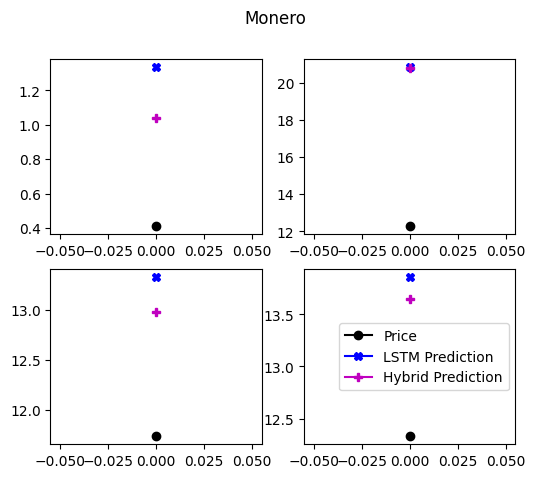

12/12 [==============================] - 0s 7ms/step
========== LSTM model | Litecoin | 3 ==========
MSE = 1132.4206748852596
RMSE = 33.65145873339311
MAE = 19.288239436777022
MAPE = 0.3224036982787296
12/12 [==============================] - 0s 12ms/step
========== hybrid model | Litecoin | 3 ==========
MSE = 1113.243845796644
RMSE = 33.36530901695119
MAE = 19.498387819827244
MAPE = 0.37439359964282976


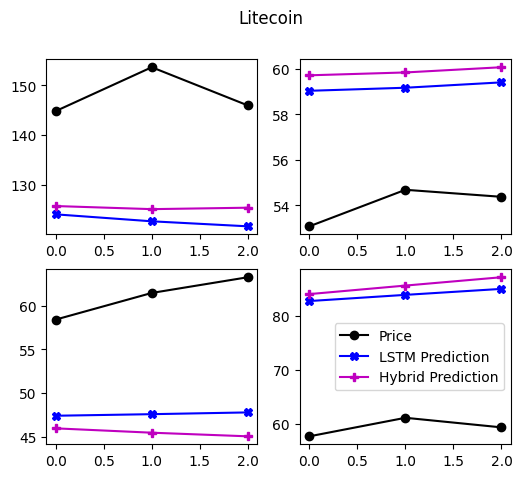

18/18 [==============================] - 0s 8ms/step
========== LSTM model | Monero | 3 ==========
MSE = 1321.669133668088
RMSE = 36.35476768827011
MAE = 17.983897738937483
MAPE = 0.9929962355187139
18/18 [==============================] - 0s 18ms/step
========== hybrid model | Monero | 3 ==========
MSE = 1292.9285210191326
RMSE = 35.95731526433992
MAE = 17.764318163206706
MAPE = 0.7781157832882584


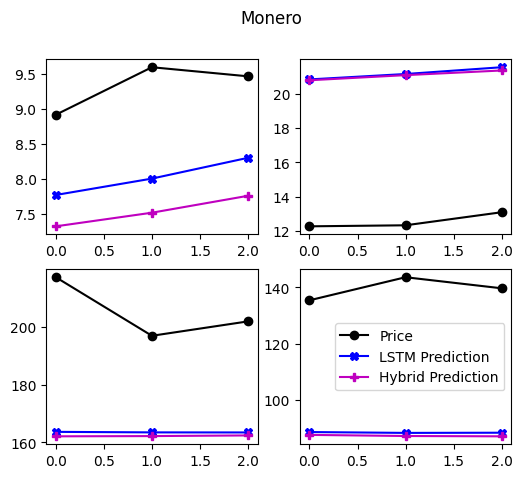

12/12 [==============================] - 0s 7ms/step
========== LSTM model | Litecoin | 7 ==========
MSE = 1086.6862156292261
RMSE = 32.96492401977026
MAE = 18.894320017767303
MAPE = 0.3214563685943515
12/12 [==============================] - 0s 12ms/step
========== hybrid model | Litecoin | 7 ==========
MSE = 1085.0518774291877
RMSE = 32.940125643797835
MAE = 19.34570711700596
MAPE = 0.39596564148175906


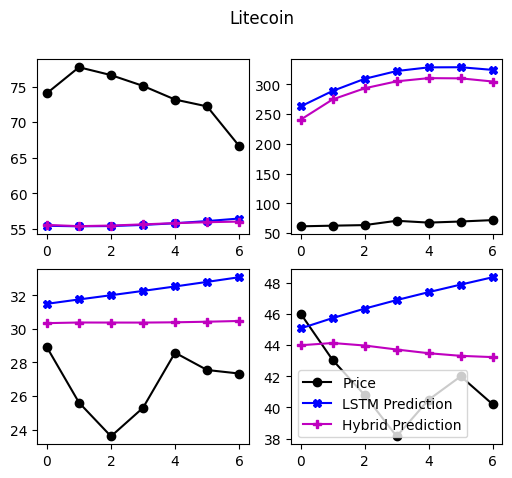

18/18 [==============================] - 0s 7ms/step
========== LSTM model | Monero | 7 ==========
MSE = 1180.8102796702408
RMSE = 34.36292012722785
MAE = 17.598216728402384
MAPE = 1.4173015235985478
18/18 [==============================] - 0s 13ms/step
========== hybrid model | Monero | 7 ==========
MSE = 1133.1181584423991
RMSE = 33.66182048615908
MAE = 17.176610089671513
MAPE = 1.0721412833220834


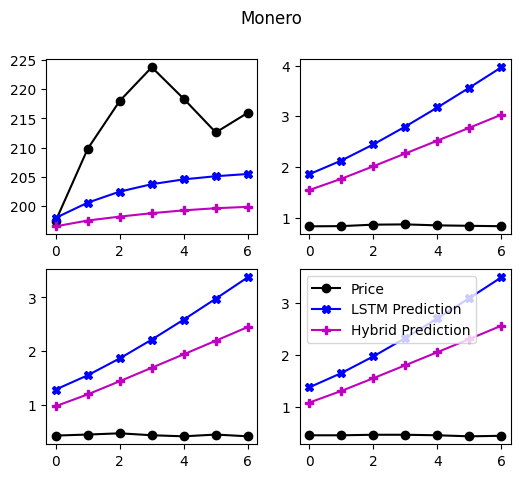

In [26]:
errors = {'l_l': {}, 'l_h': {}, 'm_l': {}, 'm_h': {}}
for w in [1, 3, 7]:
  test_indexes = np.setdiff1d(l_test_index, list(range(len(litecoin_x) - w, len(litecoin_x))))
  samples = np.random.randint(len(test_indexes), size=(4,))
  l_l_predict = np.zeros((len(test_indexes), w))
  l_l_price = np.zeros((len(test_indexes), w))
  for d in range(w):
    input = np.concatenate((litecoin_x[test_indexes, d:, 0], l_l_predict[:, :d]), axis=1)
    l_l_price[:, d] = litecoin_x[test_indexes+d, 0, 0]
    l_l_predict[:, d] = np.reshape(litecoin_lstm_model.predict(input), (len(test_indexes),))
  l_l_price = l_l_price * (litecoin_max - litecoin_min) + litecoin_min
  l_l_predict = l_l_predict * (litecoin_max - litecoin_min) + litecoin_min
  error = l_l_predict - l_l_price
  print('=' * 10 + ' LSTM model | Litecoin | ' + str(w) + ' ' + '=' * 10)
  print('MSE = ' + str(np.power(error, 2).sum()/(len(error)*w)))
  print('RMSE = ' + str(np.sqrt(np.power(error, 2).sum()/(len(error)*w))))
  print('MAE = ' + str(np.abs(error).sum()/(len(error)*w)))
  print('MAPE = ' + str(np.abs(error/l_l_price).sum()/(len(error)*w)))
  errors['l_l'][str(w)] = {'MSE': np.power(error, 2).sum()/(len(error)*w), 
                           'RMSE': np.sqrt(np.power(error, 2).sum()/(len(error)*w)),
                           'MAE': np.abs(error).sum()/(len(error)*w),
                           'MAPE': np.abs(error/l_l_price).sum()/(len(error)*w)}

  l_h_predict = np.zeros((len(test_indexes), w))
  l_h_price = np.zeros((len(test_indexes), w))
  for d in range(w):
    input = np.concatenate((litecoin_x[test_indexes, d:, 0], l_h_predict[:, :d]), axis=1)
    l_h_price[:, d] = litecoin_x[test_indexes+d, 0, 0]
    l_h_predict[:, d] = np.reshape(litecoin_hybrid_model.predict(input), (len(test_indexes),))
  l_h_price = l_h_price * (litecoin_max - litecoin_min) + litecoin_min
  l_h_predict = l_h_predict * (litecoin_max - litecoin_min) + litecoin_min
  error = l_h_predict - l_h_price
  print('=' * 10 + ' hybrid model | Litecoin | ' + str(w) + ' ' + '=' * 10)
  print('MSE = ' + str(np.power(error, 2).sum()/(len(error)*w)))
  print('RMSE = ' + str(np.sqrt(np.power(error, 2).sum()/(len(error)*w))))
  print('MAE = ' + str(np.abs(error).sum()/(len(error)*w)))
  print('MAPE = ' + str(np.abs(error/l_h_price).sum()/(len(error)*w)))
  plt.figure(figsize=(6, 5))
  for i in range(4):
    plt.subplot(2, 2, i+1)
    plt.plot(l_l_price[samples[i], :], 'o-k')
    plt.plot(l_l_predict[samples[i], :], 'X-b')
    plt.plot(l_h_predict[samples[i], :], 'P-m')
  plt.legend(['Price', 'LSTM Prediction', 'Hybrid Prediction'])
  plt.suptitle('Litecoin')
  plt.show()
  errors['l_h'][str(w)] = {'MSE': np.power(error, 2).sum()/(len(error)*w), 
                           'RMSE': np.sqrt(np.power(error, 2).sum()/(len(error)*w)),
                           'MAE': np.abs(error).sum()/(len(error)*w),
                           'MAPE': np.abs(error/l_h_price).sum()/(len(error)*w)}

  test_indexes = np.setdiff1d(m_test_index, list(range(len(monero_x) - w, len(monero_x))))
  m_l_predict = np.zeros((len(test_indexes), w))
  m_l_price = np.zeros((len(test_indexes), w))
  for d in range(w):
    input = np.concatenate((monero_x[test_indexes, d:, 0], m_l_predict[:, :d]), axis=1)
    m_l_price[:, d] = monero_x[test_indexes+d, 0, 0]
    m_l_predict[:, d] = np.reshape(monero_lstm_model.predict(input), (len(test_indexes),))
  m_l_price = m_l_price * (monero_max - monero_min) + monero_min
  m_l_predict = m_l_predict * (monero_max - monero_min) + monero_min
  error = m_l_predict - m_l_price
  print('=' * 10 + ' LSTM model | Monero | ' + str(w) + ' ' + '=' * 10)
  print('MSE = ' + str(np.power(error, 2).sum()/(len(error)*w)))
  print('RMSE = ' + str(np.sqrt(np.power(error, 2).sum()/(len(error)*w))))
  print('MAE = ' + str(np.abs(error).sum()/(len(error)*w)))
  print('MAPE = ' + str(np.abs(error/m_l_price).sum()/(len(error)*w)))
  errors['m_l'][str(w)] = {'MSE': np.power(error, 2).sum()/(len(error)*w), 
                           'RMSE': np.sqrt(np.power(error, 2).sum()/(len(error)*w)),
                           'MAE': np.abs(error).sum()/(len(error)*w),
                           'MAPE': np.abs(error/m_l_price).sum()/(len(error)*w)}

  test_indexes = np.setdiff1d(m_test_index, list(range(len(monero_x) - w, len(monero_x))))
  m_h_predict = np.zeros((len(test_indexes), w))
  m_h_price = np.zeros((len(test_indexes), w))
  for d in range(w):
    input = np.concatenate((monero_x[test_indexes, d:, 0], m_h_predict[:, :d]), axis=1)
    m_h_price[:, d] = monero_x[test_indexes+d, 0, 0]
    m_h_predict[:, d] = np.reshape(monero_hybrid_model.predict(input), (len(test_indexes),))
  m_h_price = m_h_price * (monero_max - monero_min) + monero_min
  m_h_predict = m_h_predict * (monero_max - monero_min) + monero_min
  error = m_h_predict - m_h_price
  print('=' * 10 + ' hybrid model | Monero | ' + str(w) + ' ' + '=' * 10)
  print('MSE = ' + str(np.power(error, 2).sum()/(len(error)*w)))
  print('RMSE = ' + str(np.sqrt(np.power(error, 2).sum()/(len(error)*w))))
  print('MAE = ' + str(np.abs(error).sum()/(len(error)*w)))
  print('MAPE = ' + str(np.abs(error/m_h_price).sum()/(len(error)*w)))
  plt.figure(figsize=(6, 5))
  for i in range(4):
    plt.subplot(2, 2, i+1)
    plt.plot(m_l_price[samples[i], :], 'o-k')
    plt.plot(m_l_predict[samples[i], :], 'X-b')
    plt.plot(m_h_predict[samples[i], :], 'P-m')
  plt.legend(['Price', 'LSTM Prediction', 'Hybrid Prediction'])
  plt.suptitle('Monero')
  plt.show()
  errors['m_h'][str(w)] = {'MSE': np.power(error, 2).sum()/(len(error)*w), 
                           'RMSE': np.sqrt(np.power(error, 2).sum()/(len(error)*w)),
                           'MAE': np.abs(error).sum()/(len(error)*w),
                           'MAPE': np.abs(error/m_h_price).sum()/(len(error)*w)}

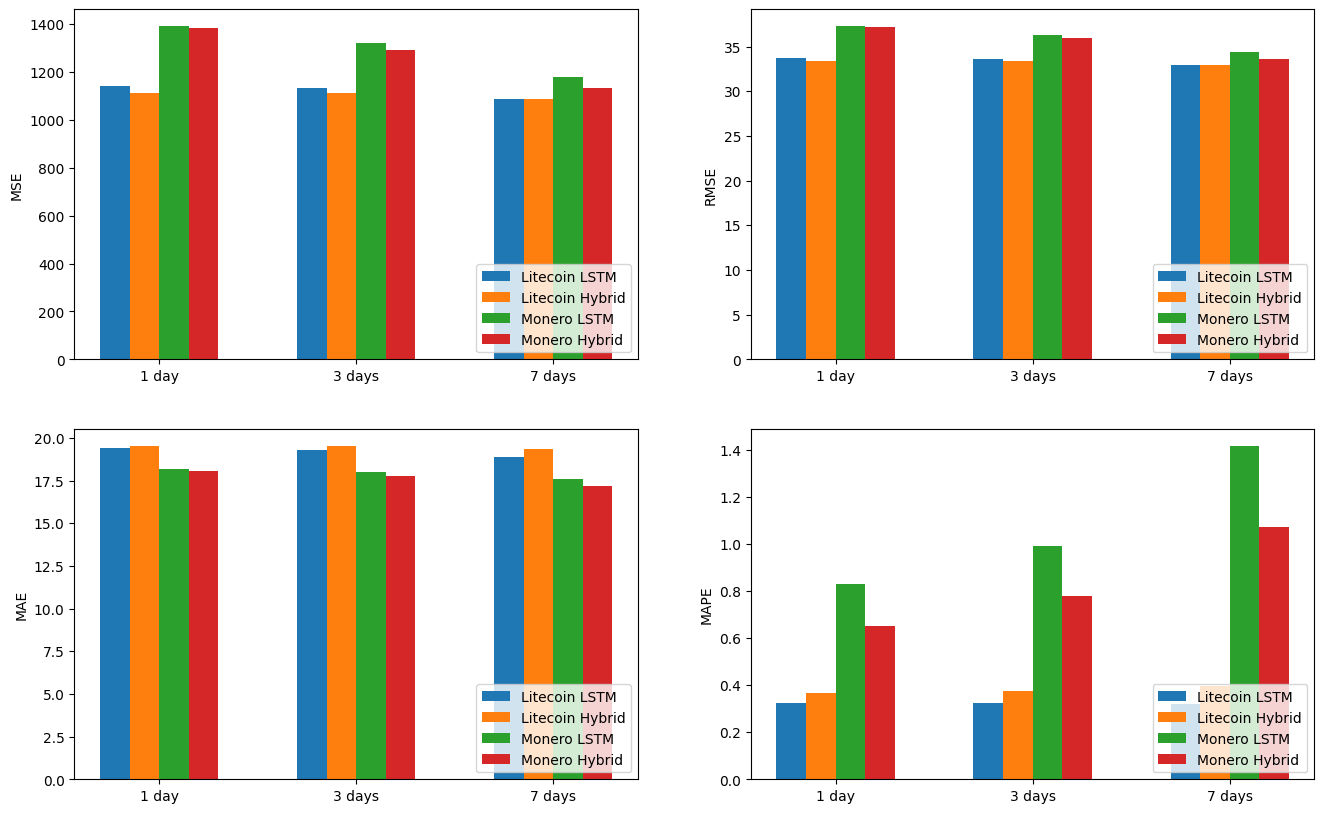

In [73]:
plt.figure(figsize=(16, 10))
metrics = ['MSE', 'RMSE', 'MAE', 'MAPE']
models = ['l_l', 'l_h', 'm_l', 'm_h']
w = [1, 3, 7]
barwidth=0.15
locations = [[(i+x) for i in range(3)] for x in np.arange(-3*barwidth/2, 5*barwidth/2, barwidth)]
for i in range(4):
  bars = []
  plt.subplot(2, 2, i+1)
  for j in range(4):
    bars += [[]]
    for k in range(3):
      bars[-1] += [errors[models[j]][str(w[k])][metrics[i]]]
    plt.bar(locations[j], bars[j], width=barwidth)
  plt.ylabel(metrics[i])
  plt.xticks([0, 1, 2], [(str(x)+' day'+ ('s' if x>1 else '')) for x in w])
  plt.legend(['Litecoin LSTM', 'Litecoin Hybrid', 'Monero LSTM', 'Monero Hybrid'], loc='lower right')
plt.show()